# 0) Import des Librairies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import seaborn as sns
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',30)

In [ ]:
#pip install fitter

# 1) Import des données

In [ ]:
#donnee_stations = pd.read_csv('donnees_stations_hydrometrie.csv')
#sites = pd.read_csv('donnees_sites_hydrometrie.csv')
donne_hydro1 = pd.read_csv('donnees_hydrometrie.csv',  low_memory=False, error_bad_lines=False)
#donne_hydro2=pd.read_csv('donnees_hydrometrie_2.csv',  low_memory=False)
#donne_meteo = pd.read_csv('donnees_meteo_2020-2023.csv')

<ipython-input-110-6742c332bd3c>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  donne_hydro1 = pd.read_csv('donnees_hydrometrie.csv',  low_memory=False, error_bad_lines=False)


## 2.1) Traitement des données hydro

## 2.1.1) Création d'un dataframe hydro

In [ ]:
stations = donne_hydro1["code_station"].unique()[:50]

In [ ]:
station_test=donne_hydro1[donne_hydro1["code_station"].isin(stations)]

## 2.1.2) Recherche d'une Loi

### 2.1.2.1) Utilisation Loi de Pareto

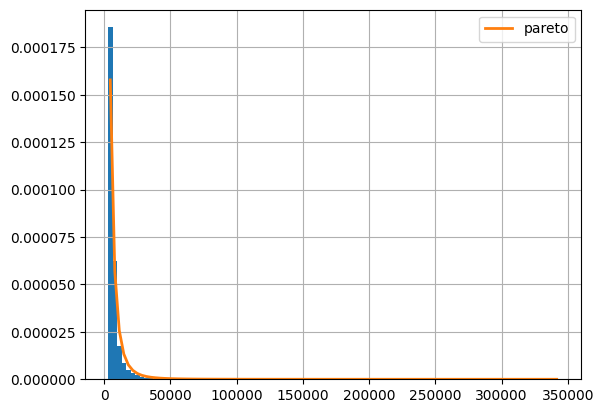

In [ ]:
import pandas as pd
from fitter import Fitter

# Supposons que votre dataframe s'appelle station_test et a les colonnes 'code_station' et 'resultat_obs_elab'

# Créez des listes pour stocker les informations
stations = []
lois_choisies = []
param_b = []
param_scale = []
param_shape = []
resultats_aic = []
res_proba_95 = []
res_proba_90 = []
res_proba_85 = []

for station in station_test['code_station'].unique():
    data_station = station_test[station_test['code_station'] == station]
    Proba_95 = data_station['resultat_obs_elab'].quantile(0.95)
    Proba_90 = data_station['resultat_obs_elab'].quantile(0.90)
    Proba_85 = data_station['resultat_obs_elab'].quantile(0.85)
    hauteur = data_station["resultat_obs_elab"].values
    f = Fitter(hauteur, distributions=['pareto'])
    f.fit()
    meilleure_distribution = f.get_best(method='aic')
    x = list(meilleure_distribution.keys())
    meilleures_cles = x  # Store all keys for the best-fitted distributions

    # Iterate through all keys and append to lois_choisies list
    lois_choisies.extend(meilleures_cles)

    aic = f.summary(method="aic")["aic"].values[0]
    # Récupérez les paramètres du modèle
    param_b_value = f.fitted_param[meilleures_cles[0]][0]
    param_scale_value = f.fitted_param[meilleures_cles[0]][1]
    param_shape_value = f.fitted_param[meilleures_cles[0]][2]

    # Ajoutez les informations à vos listes
    stations.append(station)
    param_b.append(param_b_value)
    param_scale.append(param_scale_value)
    param_shape.append(param_shape_value)
    resultats_aic.append(aic)
    res_proba_95.append(Proba_95)
    res_proba_90.append(Proba_90)
    res_proba_85.append(Proba_85)

# Créez un dataframe à partir des listes
df_resultats = pd.DataFrame({
    'Station': stations,
    'a': param_b,
    'loc': param_scale,
    'scale': param_shape,
    'Score_Aic': resultats_aic,
    'Proba_95_%': res_proba_95,
    'Proba_90_%': res_proba_90,
    'Proba_85_%': res_proba_85,
    'Loi_Choisie': lois_choisies  # Store all best-fitted distribution keys
})


In [ ]:
df_resultats

,Station,a,loc,scale,Score_Aic,Proba_95_%,Proba_90_%,Proba_85_%,Loi_Choisie
0,1015000101,1.301375e+02,-1.168995e+05,1.169215e+05,2777.466681,2517.00,1658.6,1323.40,pareto
1,1025000101,8.194438e+00,-3.641162e+04,3.774162e+04,3442.859217,15557.40,11228.4,9146.00,pareto
2,1110000101,7.312577e+07,-6.871948e+10,6.871948e+10,3136.239829,2486.95,1758.7,1491.55,pareto
3,1120000101,1.237057e+01,-2.035925e+04,2.065225e+04,2493.886293,5833.25,4289.5,3362.50,pareto
4,1221000101,4.347825e-02,1.000000e+03,5.720892e-08,2477.151935,6693.50,6298.0,5477.00,pareto
5,2014000101,8.554448e+00,-1.556480e+03,1.576480e+03,3023.756620,621.00,420.0,334.30,pareto
6,2101000102,5.938672e+00,-2.372356e+03,2.691356e+03,4268.441401,1869.30,1298.2,1054.00,pareto
7,2205000101,6.528712e+00,-1.193398e+04,1.223198e+04,2745.591303,7376.40,4740.2,3613.00,pareto
8,2221000101,4.038274e+00,-2.214495e+02,2.344495e+02,2602.327641,272.00,174.8,134.00,pareto
9,2225000101,2.388803e+00,-1.970106e+03,2.022106e+03,3123.940290,5671.05,2712.6,1913.60,pareto


## 2.1.3) Calcul Probabilité Loi de Pareto

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pareto

# Créer un dataframe pour stocker les valeurs en dehors de la plage
outside_range_df = pd.DataFrame(columns=df_resultats.columns)

i = 0
# Liste pour stocker les index à supprimer de df_resultats
indices_to_remove = []

# Loop through each row in station_test
for index, row in station_test.head(50).iterrows():
    x_value = row['resultat_obs_elab']

    b_value = df_resultats["a"][i]
    loc_value = df_resultats["loc"][i]
    scale_value = df_resultats["scale"][i]

    pareto_dist = pareto(b=b_value, loc=loc_value, scale=scale_value)

    quantile_95 = df_resultats["Proba_95_%"][i]

    probability_95_pct = pareto_dist.cdf(quantile_95)

    # Vérifier si la probabilité est en dehors de la plage (0.92, 0.98)
    if probability_95_pct < 0.92 or probability_95_pct > 0.98:
        # Stocker les valeurs dans le dataframe outside_range_df
        outside_range_df = outside_range_df.append(df_resultats.loc[index])
        # Ajouter l'index à la liste des indices à supprimer
        indices_to_remove.append(index)

    df_resultats.at[index, 'probability_95_%'] = probability_95_pct

    i = i + 1

df_pareto = df_resultats.drop(indices_to_remove)



<ipython-input-115-ebf75a216bd5>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outside_range_df = outside_range_df.append(df_resultats.loc[index])
<ipython-input-115-ebf75a216bd5>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outside_range_df = outside_range_df.append(df_resultats.loc[index])
<ipython-input-115-ebf75a216bd5>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outside_range_df = outside_range_df.append(df_resultats.loc[index])
<ipython-input-115-ebf75a216bd5>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outside_range_df = outside_range_df.append(df_resultats.loc[index])
<ipython-input-115-ebf75a216bd5>:29: Fut

In [ ]:
df_pareto

,Station,a,loc,scale,Score_Aic,Proba_95_%,Proba_90_%,Proba_85_%,Loi_Choisie,probability_95_%
0,1015000101,1.301375e+02,-1.168995e+05,1.169215e+05,2777.466681,2517.00,1658.6,1323.40,pareto,0.935931
1,1025000101,8.194438e+00,-3.641162e+04,3.774162e+04,3442.859217,15557.40,11228.4,9146.00,pareto,0.927290
3,1120000101,1.237057e+01,-2.035925e+04,2.065225e+04,2493.886293,5833.25,4289.5,3362.50,pareto,0.947126
5,2014000101,8.554448e+00,-1.556480e+03,1.576480e+03,3023.756620,621.00,420.0,334.30,pareto,0.936889
6,2101000102,5.938672e+00,-2.372356e+03,2.691356e+03,4268.441401,1869.30,1298.2,1054.00,pareto,0.932899
7,2205000101,6.528712e+00,-1.193398e+04,1.223198e+04,2745.591303,7376.40,4740.2,3613.00,pareto,0.949255
8,2221000101,4.038274e+00,-2.214495e+02,2.344495e+02,2602.327641,272.00,174.8,134.00,pareto,0.950471
9,2225000101,2.388803e+00,-1.970106e+03,2.022106e+03,3123.940290,5671.05,2712.6,1913.60,pareto,0.958235
10,2225000301,8.216235e+00,-3.671122e+03,3.896122e+03,2058.241859,1911.45,1580.9,1360.70,pareto,0.947927
11,2301000101,4.281434e+00,-6.772533e+02,7.012533e+02,2262.510243,689.00,596.6,428.40,pareto,0.942475


### 2.1.4) Rehcherche loi autre que Pareto

In [ ]:
stations_out = outside_range_df["Station"].unique()
station_test_out=donne_hydro1[donne_hydro1["code_station"].isin(stations_out)]

In [ ]:
distributions_extremes = [
    'gumbel_l', 'gumbel_r',
    'weibull_min',
    'genextreme',
    'weibull_max',
    'lognorm',
    'exponweib',
    'exponpow'
]

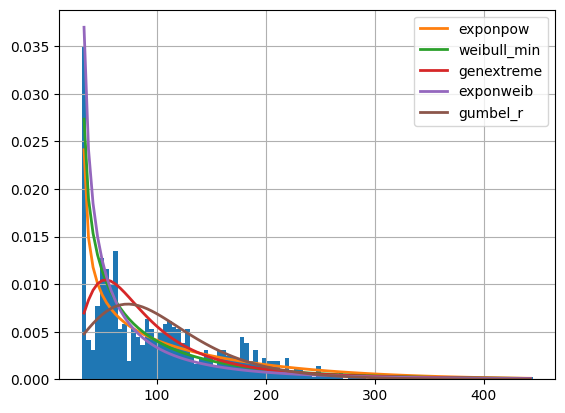

In [ ]:

# Créez des listes pour stocker les informations
stations_extremes = []
lois_choisies_extremes = []
param_b_extremes = []
param_scale_extremes = []
param_shape_extremes = []
resultats_aic_extremes = []
quantile_95_values = []

for station in station_test_out['code_station'].unique():
    data_station_extremes = station_test_out[station_test_out['code_station'] == station]
    hauteur_extremes = data_station_extremes["resultat_obs_elab"].values
    Proba_95 = data_station_extremes['resultat_obs_elab'].quantile(0.95)
    f_extremes = Fitter(hauteur_extremes, distributions=distributions_extremes)
    f_extremes.fit()
    meilleure_distribution_extremes = f_extremes.get_best(method='aic')
    x_extremes = list(meilleure_distribution_extremes.keys())
    meilleures_cles_extremes = x_extremes  # Store all keys for the best-fitted distributions

    # Iterate through all keys and append to lois_choisies_extremes list
    lois_choisies_extremes.extend(meilleures_cles_extremes)

    aic_extremes = f_extremes.summary(method="aic")["aic"].values[0]

    # Récupérez les paramètres du modèle
    param_b_value_extremes = f_extremes.fitted_param[meilleures_cles_extremes[0]][0]
    param_scale_value_extremes = f_extremes.fitted_param[meilleures_cles_extremes[0]][1]
    param_shape_value_extremes = f_extremes.fitted_param[meilleures_cles_extremes[0]][2]

    # Ajoutez les informations à vos listes
    stations_extremes.append(station)
    param_b_extremes.append(param_b_value_extremes)
    param_scale_extremes.append(param_scale_value_extremes)
    param_shape_extremes.append(param_shape_value_extremes)
    resultats_aic_extremes.append(aic_extremes)

    # Calcul du quantile 0.95 en float
    quantile_95_values.append((Proba_95))

# Créez un dataframe à partir des listes pour les stations en dehors de la plage
df_resultats_extremes = pd.DataFrame({
    'Station': stations_extremes,
    'a': param_b_extremes,
    'loc': param_scale_extremes,
    'scale': param_shape_extremes,
    'Score_Aic': resultats_aic_extremes,
    'Loi_Choisie': lois_choisies_extremes,  # Store all best-fitted distribution keys
    'Quantile_95_Value': quantile_95_values
})

In [ ]:
df_resultats_extremes

,Station,a,loc,scale,Score_Aic,Loi_Choisie,Quantile_95_Value
0,1110000101,8.221148,0.144443,127.999924,2282.618776,exponweib,2486.95
1,1221000101,0.828657,1000.000000,4399.658857,1937.283099,exponpow,6693.50
2,2301000201,0.107794,2437.000000,1.730355,2063.667667,weibull_max,431.10
3,2511000101,-0.181591,256.887312,83.502742,1872.472226,genextreme,584.10
4,2512000401,53.487440,0.699398,-368.568305,1869.016755,exponweib,2367.25
5,3033000301,-0.177177,46.622226,25.906718,1436.200504,genextreme,146.00
6,3052000101,0.568354,31.000000,148.333796,1379.632924,exponpow,225.30


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pareto, expon, powerlaw, genextreme, gumbel_l, gumbel_r, weibull_min, weibull_max, lognorm, exponweib, exponpow

i = -1
# Loop through each row in station_test_out
for index, row in station_test_out.head(7).iterrows():
    i = i + 1
    x_value = row['resultat_obs_elab']

    # Les colonnes qui contiennent les informations sur la loi et ses paramètres
    distribution_key = df_resultats_extremes['Loi_Choisie'][i]

    if distribution_key == 'pareto':
        params = pareto.fit(row['resultat_obs_elab'])
        dist_instance = pareto(*params)
    elif distribution_key == 'expon':
        params = expon.fit(row['resultat_obs_elab'])
        dist_instance = expon(*params)
    elif distribution_key == 'powerlaw':
        params = powerlaw.fit(row['resultat_obs_elab'])
        dist_instance = powerlaw(*params)
    elif distribution_key == 'genextreme':
        params = genextreme.fit(row['resultat_obs_elab'])
        dist_instance = genextreme(*params)
    elif distribution_key == 'gumbel_l':
        params = gumbel_l.fit(row['resultat_obs_elab'])
        dist_instance = gumbel_l(*params)
    elif distribution_key == 'gumbel_r':
        params = gumbel_r.fit(row['resultat_obs_elab'])
        dist_instance = gumbel_r(*params)
    elif distribution_key == 'weibull_min':
        params = weibull_min.fit(row['resultat_obs_elab'])
        dist_instance = weibull_min(*params)
    elif distribution_key == 'weibull_max':
        params = weibull_max.fit(row['resultat_obs_elab'])
        dist_instance = weibull_max(*params)
    elif distribution_key == 'lognorm':
        params = lognorm.fit(row['resultat_obs_elab'])
        dist_instance = lognorm(*params)
    elif distribution_key == 'exponweib':
        params = exponweib.fit(row['resultat_obs_elab'])
        dist_instance = exponweib(*params)
    elif distribution_key == 'exponpow':
        params = exponpow.fit(row['resultat_obs_elab'])
        dist_instance = exponpow(*params)
    else:
        probability_95_pct = np.nan
        continue

    probability_95_pct = dist_instance.cdf(x_value)

    df_resultats_extremes.at[i, 'probability_95_%'] = probability_95_pct


In [ ]:
df_resultats_extremes

,Station,a,loc,scale,Score_Aic,Loi_Choisie,Quantile_95_Value,probability_95_%
0,1110000101,8.221148,0.144443,127.999924,2282.618776,exponweib,2486.95,0.000000
1,1221000101,0.828657,1000.000000,4399.658857,1937.283099,exponpow,6693.50,0.712754
2,2301000201,0.107794,2437.000000,1.730355,2063.667667,weibull_max,431.10,0.522754
3,2511000101,-0.181591,256.887312,83.502742,1872.472226,genextreme,584.10,0.367879
4,2512000401,53.487440,0.699398,-368.568305,1869.016755,exponweib,2367.25,0.000000
5,3033000301,-0.177177,46.622226,25.906718,1436.200504,genextreme,146.00,0.367879
6,3052000101,0.568354,31.000000,148.333796,1379.632924,exponpow,225.30,0.713672


In [ ]:
for index, row in station_test.head(50).iterrows():
    x_value = row['resultat_obs_elab']



    # Les colonnes qui contiennent les informations sur la loi et ses paramètres
    distribution_key = station_info['Loi_Choisie']
    param_b_value = station_info['a']
    param_scale_value = station_info['loc']
    param_shape_value = station_info['scale']

    # Définir la distribution en fonction de la clé de distribution choisie
    if distribution_key == 'pareto':
        dist_instance = pareto(b=param_b_value, loc=param_scale_value, scale=param_shape_value)
    elif distribution_key == 'expon':
        dist_instance = expon(loc=param_scale_value, scale=param_shape_value)
    elif distribution_key == 'powerlaw':
        dist_instance = powerlaw(a=param_b_value, loc=param_scale_value, scale=param_shape_value)
    elif distribution_key == 'genextreme':
        dist_instance = genextreme(c=param_b_value, loc=param_scale_value, scale=param_shape_value)
    else:
        # Si la distribution n'est pas spécifiée, mettez la probabilité à NaN (ou une valeur par défaut)
        probability_95_pct = np.nan
        continue

    # Calculer la probabilité
    probability_95_pct = dist_instance.cdf(x_value)

    # Ajouter la probabilité au dataframe
    df_resultats_extremes.at[index, 'probability_95_%'] = probability_95_pct

    # Ajouter les valeurs en dehors de la plage au dataframe outside_range_df
    outside_range_df.at[index, 'probability_95_%'] = probability_95_pct
    if not (0.92 <= probability_95_pct <= 0.98):
        outside_range_df = outside_range_df.append(station_info)

# Afficher le dataframe contenant les valeurs en dehors de la plage
print(outside_range_df)

# Afficher le dataframe final avec les probabilités
print(df_resultats_extremes)

,Station,a,loc,scale,Score_Aic,Loi_Choisie,Quantile_95_Value,probability_95_%
0,1110000101,8.221148,0.144443,127.999924,2282.618776,exponweib,2486.95,1.00000
1,1221000101,0.828657,1000.000000,4399.658857,1937.283099,exponpow,6693.50,0.19235
2,2301000201,0.107794,2437.000000,1.730355,2063.667667,weibull_max,431.10,0.00000
3,2511000101,-0.181591,256.887312,83.502742,1872.472226,genextreme,584.10,NaN
4,2512000401,53.487440,0.699398,-368.568305,1869.016755,exponweib,2367.25,NaN
5,3033000301,-0.177177,46.622226,25.906718,1436.200504,genextreme,146.00,NaN
6,3052000101,0.568354,31.000000,148.333796,1379.632924,exponpow,225.30,NaN


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pareto



i = 0


# Loop through each row in station_test
for index, row in station_test.head(50).iterrows():
    x_value = row['resultat_obs_elab']

    b_value = df_resultats["a"][i]
    loc_value = df_resultats["loc"][i]
    scale_value = df_resultats["scale"][i]

    pareto_dist = pareto(b=b_value, loc=loc_value, scale=scale_value)

    quantile_95 = df_resultats["Proba_95_%"][i]

    probability_95_pct = pareto_dist.cdf(quantile_95)

    # Vérifier si la probabilité est en dehors de la plage (0.92, 0.98)
    if probability_95_pct < 0.92 or probability_95_pct > 0.98:
        # Stocker les valeurs dans le dataframe outside_range_df
        outside_range_df = outside_range_df.append(df_resultats.loc[index])
        # Ajouter l'index à la liste des indices à supprimer
        indices_to_remove.append(index)

    df_resultats.at[index, 'probability_95_%'] = probability_95_pct

    i = i + 1

df_pareto = df_resultats.drop(indices_to_remove)

<ipython-input-106-2beb5c16aa93>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outside_range_df = outside_range_df.append(df_resultats.loc[index])
<ipython-input-106-2beb5c16aa93>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outside_range_df = outside_range_df.append(df_resultats.loc[index])
<ipython-input-106-2beb5c16aa93>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outside_range_df = outside_range_df.append(df_resultats.loc[index])
<ipython-input-106-2beb5c16aa93>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outside_range_df = outside_range_df.append(df_resultats.loc[index])
<ipython-input-106-2beb5c16aa93>:27: Fut

In [ ]:
df_resultats.to_excel("Res_Pi_2.xlsx")

In [ ]:
fig = px.histogram(df_resultats, x="probability_85_%")
fig.show()

ValueError: ignored

# 3) Data Visualisation

hydrometric daily mean flow

In [ ]:
fig = px.histogram(station_test, x="resultat_obs_elab")
fig.show()

In [ ]:
fig = px.box(station_test, y="resultat_obs_elab")

fig.show(renderer="colab")

# Recherche d'une loi

In [ ]:
pip install fitter

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=station_test, x="resultat_obs_elab", kind="hist", bins = 100, aspect = 1.5)

In [ ]:
hauteur= station_test["resultat_obs_elab"].values

In [ ]:
 get_distributions()

In [ ]:
f = Fitter(hauteur,
           distributions=["pareto"])
f.fit()
x =f.summary(method="aic")["aic"]

In [ ]:
x.astype(float)

In [ ]:
f.summary([3])

In [ ]:
mon_dictionnaire = f.get_best(method = 'aic')

x =  list(mon_dictionnaire.keys())

premiere_cle = x[0]

print(x)

In [ ]:
mon_dictionnaire = {'a': 1, 'b': 2, 'c': 3}

# Obtenez toutes les clés du dictionnaire sous forme de liste
cles_dictionnaire = list(mon_dictionnaire.keys())

# Accédez au premier élément de la liste (correspondant à la première clé du dictionnaire)
premiere_cle = cles_dictionnaire[0]

print(premiere_cle)

In [ ]:
get_best

In [ ]:
f.fitted_param["pareto"]

In [ ]:
f.fitted_param["pareto"][0]

In [ ]:

plt.hist(hauteur, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogram')

# Use fitter to fit a distribution
f = Fitter(hauteur, distributions=['pareto'])
f.fit()

# Plot the PDF
f.plot_pdf()
plt.title('Histogram and Fitted Pareto Distribution for "high" column')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [ ]:
f.plot_pdf()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto


params = {'b': 3.719403545276367, 'loc': -19001.957507931664, 'scale': 19209.95750793166}


x_values = station_test["resultat_obs_elab"].values

# Define the Pareto
pareto_dist = pareto(b=params['b'], loc=params['loc'], scale=params['scale'])

pdf_values = pareto_dist.pdf(x_values)


# Plotting the Pareto PDF
plt.figure(figsize=(10, 10))
plt.plot(x_values, pdf_values, label='Pareto PDF', color='red')
plt.hist(hauteur, bins=1000, density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogram')
plt.title('Pareto Probability Density Function')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
station_test.describe()

In [ ]:
probability_gt_50000 = 1 - pareto_dist.cdf(1000)

print(f"La probabilité d'avoir un débit volumique journalier supérieur à 1000 est : {probability_gt_50000*100:.4f} %")

In [ ]:
probability_gt_50000 = 1 - pareto_dist.cdf(10000)

print(f"La probabilité d'avoir un débit volumique journalier supérieur à 10000 est: {probability_gt_50000*100:.4f} %")

In [ ]:
probability_gt_50000 = 1 - pareto_dist.cdf(50000)

print(f"La probabilité d'avoir un débit volumique journalier supérieur à 50000 est: {probability_gt_50000*100:.4f} %")

In [ ]:
probability_gt_50000 = 1 - pareto_dist.cdf(100000)

print(f"La probabilité d'avoir un débit volumique journalier supérieur à 100000 est: {probability_gt_50000*100:.4f} %")

In [ ]:
probability_gt_50000 = 1 - pareto_dist.cdf(150000)

print(f"La probabilité d'avoir un débit volumique journalier supérieur à 150000 est: {probability_gt_50000*100:.4f} %")